In [9]:
import numpy as np
from lib import plot
import IPython
import noise

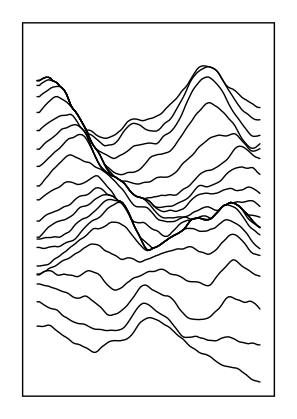

In [10]:
paper = plot.A6_PORTRAIT
p_svg = plot.SVGPlotter('plots/landscape.svg', paper)
p_hpgl = plot.HPGLPlotter(paper, 'plots/landscape_{index}.hpgl')
plotter = plot.MultiPlotter()
plotter.register_plotter(p_svg)
plotter.register_plotter(p_hpgl)

plotter.move_to(paper.bottom_left())
plotter.line_to(paper.bottom_right())
plotter.line_to(paper.top_right())
plotter.line_to(paper.top_left())
plotter.line_to(paper.bottom_left())

centre = paper.centre()

shape = (100, 21)
scale = .6
octaves = 6
persistence = 0.4
lacunarity = 1.8
seed = np.random.randint(0, 100)

world = np.zeros(shape)

x_idx = np.linspace(0, 1, shape[0])
y_idx = np.linspace(0, 1, shape[1])
world_x, world_y = np.meshgrid(x_idx, y_idx)

world = np.vectorize(noise.pnoise2)(world_x / scale,
        world_y / scale,
        octaves=octaves,
        persistence=persistence,
        lacunarity=lacunarity,
        repeatx=1024,
        repeaty=1024,
        base=seed)

def tf(coord):
    return paper.width * 0.75 * (np.array(coord) - [0.5, 0.5]) + centre

for i in reversed(range(len(y_idx) - 1)):
    world[i, :] = np.min([world[i, :], world[i + 1, :] - (y_idx[0] - y_idx[1])], axis=0)

for i, y in enumerate(y_idx):
    plotter.move_to(tf((0, y + world[i, 0])))
    for j, x in enumerate(x_idx[1:]):
        plotter.line_to(tf((x, y + world[i, j])))

plotter.finalise()

IPython.display.SVG(filename=p_svg.file_name)